# Introduction

In this project, we will work with a **fuel quality data** containing thousands of rows. The dataset is provided by the United States Energy Information Administration and contains information on the fuel type, fuel quantity, power plant producing the fuel and various fuel costs.

The aim of this project is to:

- Explore operating costs of power plants. 

- See how fuel costs impact the viability of generation sources. 

- Highlight the competitiveness of renewable electricity. 

- Show how generation mix of different utilities evolved over time.

The *data dictionary* provided with the data is as follows:


- **record_id** - record id 


- **utility_id_ferc1** - Utility id assigned by the FERC


- **report_year** - year of report


- **plant_name_ferc1** - the name of the plant


- **fuel_type_code_pudl** - the type of fuel


- **fuel_unit** - the unit of fuel


- **fuel_qty_burned** - the quantity of fuel burned


- **fuel_mmbtu_per_unit** - the measure of energy per unit


- **fuel_cost_per_unit_burned** - the fuel cost per unit burned


- **fuel_cost_per_unit_delivered** - the cost of fuel delivered per unit 


- **fuel_cost_per_mmbtu**</span> \- the cost of fuel per mmbtu


Let's import the necessary library and read in the data into a pandas dataframe.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [2]:
# reading in the data from local
fuel_data = pd.read_csv('/storage/emulated/0/Hamoye/Stage A/utility.csv')


### Question 3
##### Which fuel type has the lowest average fuel cost per unit burned?


The fuel type column is represented by the `fuel_type_code_pudl` column in the `fuel_data` dataframe. To know which fuel type has the lowest average fuel cost per unit burned, we are going to group the values in the `fuel_type_code_pudl` column using `DataFrame.groupby` method. 

From the *groupby* object returned, we then select the column we are interested in, which is the `fuel_cost_per_unit_burned` column, and find the **average(mean)** of the grouped values.

In [3]:
fuel_type_grouped = fuel_data.groupby('fuel_type_code_pudl')

In [4]:
# Finding the average for the column
# and sorting the values in ascending order
fuel_type_grouped['fuel_cost_per_unit_burned'].mean().sort_values()

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

From the above cell, the fuel type with the lowest average fuel cost per unit burned is **gas** with a value of **13.659397**.

We can also visualize this in a *barplot* with a little tweak to accomodate for extreme values. In the barplot below, the `ax.set_ylim()` is set to be between *0* and *100* so as to enable us to have a zoom-in view of the chart.The **orange** bar represent the lowest value, which is **gas**.

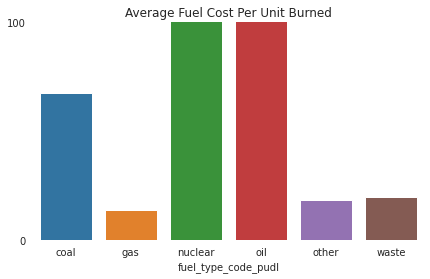

In [5]:
avg_fuel_cost_PUB = fuel_type_grouped['fuel_cost_per_unit_burned'].mean()
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x=avg_fuel_cost_PUB.index, y=avg_fuel_cost_PUB.values)
sns.despine(bottom=True, left=True)
ax.set_ylim(0, 100)
ax.set_yticks([0, 100])
ax.set_title('Average Fuel Cost Per Unit Burned')
plt.show()

### Question 4
##### What is the standard deviation and 75th percentile of the measure of energy per unit (fuel_mmbtu_per_unit) in two decimal places?

We can derive this by looking at the description of the `fuel_mmbtu_per_unit` column of the `fuel_data` column using `DateFrame.describe()` method.

In [6]:
fuel_data['fuel_mmbtu_per_unit'].describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

From the description of the `fuel_mmbtu_per_unit` column above, the **std** which stands for *standard deviation* is **10.600220** and the **75%** which is the *75th percentile* is **17.00600**.

In two decimal places, we have them as **10.60** and **17.01** respectively.

### Question 5
##### What is the skewness and kurtosis for the fuel quantity burned in two decimal places.

Both *skewness* and *kurtosis* can be calculated by their respective `DataFrame.skew()` and `DataFrame.kurtosis()` methods. They both have fairly similar way of calculation as both have the same set of parameters. 

For either, it is important to specify the right axis for the calculation if the operation is being performed on a pandas DataFrame.

In our case, we are concerned with the `fuel_qty_burned` column, so our calculation is pretty straightforward and we also don't need to specify a value for the *axis* parameter.

In [7]:
fuel_data['fuel_qty_burned'].skew()


15.851495469109503

In [8]:
fuel_data['fuel_qty_burned'].kurtosis()

651.3694501337732

From the previous two cells, we have our *skewness* and *kurtosis* for the `fuel_qty_burned` column as **15.85** and **651.37** respectively in two decimal places.

### Question 8
##### Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?

This can be found using `DataFrame.corr()` method.

In [9]:
corr_fuel_data = fuel_data.corr()

The correlation for the `fuel_data` dataframe has been stored in another dataframe called `corr_fuel_data` as shown above. 

We can use `DataFrame.loc` method to display the correlation for just the `fuel_cost_per_unit_burned` column and sort the values in **descending** order.

In [10]:
corr_fuel_data.loc['fuel_cost_per_unit_burned'].sort_values(ascending=False)


fuel_cost_per_unit_burned       1.000000
report_year                     0.013599
fuel_cost_per_unit_delivered    0.011007
fuel_cost_per_mmbtu            -0.000437
fuel_mmbtu_per_unit            -0.010034
fuel_qty_burned                -0.018535
utility_id_ferc1               -0.037863
Name: fuel_cost_per_unit_burned, dtype: float64

We can see from the output that the features with the second and third lowest correlation with `fuel_cost_per_unit_burned` is `fuel_qty_burned` and `fuel_mmbtu_per_unit` respectively.

### Question 9
##### For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?

From the `fuel_data` dataframe, we need to return a new dataframe that displays column values only when the `fuel_type_code_pudl` column is **coal**. 

This can be done using boolean indexing. 


So we want to return a DataFrame when the `fuel_type_code_pudl` == *'coal'* **and** the `report_year` is *1994* **or** *1998*

In [11]:
coal_fuel_94_98 = fuel_data[(fuel_data['fuel_type_code_pudl']=='coal') & ((fuel_data['report_year']==1994) | (fuel_data['report_year']==1998))]

In [12]:
coal_fuel_94_98

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.210,45.990,1.970
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922,44.240,43.250,1.850
...,...,...,...,...,...,...,...,...,...,...,...
5708,f1_fuel_1998_12_145_0_10,145,1998,comanche,coal,ton,2732360.0,17.134,15.151,15.035,0.884
5710,f1_fuel_1998_12_145_0_13,145,1998,craig,coal,ton,324689.0,20.058,21.055,21.386,1.050
5712,f1_fuel_1998_12_145_1_1,145,1998,hayden,coal,ton,802459.0,21.092,22.596,22.691,1.071
5714,f1_fuel_1998_12_145_1_4,145,1998,pawnee,coal,ton,2104342.0,16.684,14.035,13.596,0.842


From the previous output, we have a total of **906** entries for years *1994* and *1998*. 

So we use the `DataFrame.groupby()` method to group the `coal_fuel_94_98` dataframe by the `report_year` and perform our operation on them.

In [13]:
grouped = coal_fuel_94_98.groupby('report_year')

What we have here is a *groupby* object. We are concerned mainly with the `fuel_cost_per_unit_burned` column; let's select this column from `grouped` and find the sum of the values corresponding to the year *1994* and *1998*.

In [14]:
grouped['fuel_cost_per_unit_burned'].sum()

report_year
1994    14984.572
1998    11902.597
Name: fuel_cost_per_unit_burned, dtype: float64

We can now calculate the **percentage change** from *1994* to *1998*.

In [15]:
FC_year_1994 = 14984.572
FC_year_1998 = 11902.597

pct_chg = ((FC_year_1994 - FC_year_1998)/ FC_year_1994) * 100
print ('Percentage change is {:.0f}%'.format(pct_chg))

Percentage change is 21%


It is important to note that the **21%** was a decrease, as the cost in *1998* is lower than that of *1994*.

### Question 10
##### Which year has the highest average fuel cost per unit delivered?

Here, we are again going to use the `DataFrame.groupby` method to group the `fuel_data` dataframe by `report_year`. This will enable us to find the average of the fuel cost per unit delivered for all entries in each year, and then sort the values to find the year with the highest average.

In [16]:
grouped_report_year = fuel_data.groupby('report_year')

We are interested in the `fuel_cost_per_unit_delivered` column; so let's select that and calculate the average.

In [17]:
grouped_report_year['fuel_cost_per_unit_delivered'].mean().sort_values(ascending=False)


report_year
1997    11140.197239
1996     9196.705948
2000      985.362877
2009      652.694163
2018      499.269966
2015      326.535511
1998      287.154420
2014      192.737183
2013      172.307591
2004      139.524275
2016      103.901761
2010       91.862105
1994       63.636060
2012       60.994502
2001       60.050396
2011       59.774667
2008       58.588197
2003       55.663493
2002       47.594361
2017       46.196861
2007       43.325023
2005       41.438184
2006       38.657484
1995       32.735269
1999       25.551627
Name: fuel_cost_per_unit_delivered, dtype: float64

Above, we have our answer in descending order, and we can see that the highest value is *11140.187239*. The year corresponding to this is **1997**.